# Description
This script extracts the shapefile of the Lombardy region from NUTS level 2 dataset. 

In [13]:
import pandas as pd
import geopandas as gpd
import os
cwd = os.getcwd()
cwd_NUTS = cwd + "\\NUTS"

In [2]:
# Read NUTS shapefile (level 2)
NUTS_2 = gpd.read_file(cwd_NUTS + '\\NUTS_RG_01M_2021_4326_LEVL_2.shp')
NUTS_2.head()

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,FRB0,2,FR,Centre — Val de Loire,Centre — Val de Loire,0.0,0,0,FRB0,"POLYGON ((1.50153 48.94105, 1.51118 48.93461, ..."
1,CZ04,2,CZ,Severozápad,Severozápad,0.0,0,0,CZ04,"POLYGON ((14.49122 51.04353, 14.49945 51.04610..."
2,CZ07,2,CZ,Střední Morava,Střední Morava,0.0,0,0,CZ07,"POLYGON ((16.90792 50.44945, 16.92475 50.43939..."
3,DK02,2,DK,Sjælland,Sjælland,0.0,0,0,DK02,"MULTIPOLYGON (((12.27222 55.05490, 12.28522 55..."
4,ES12,2,ES,Principado de Asturias,Principado de Asturias,0.0,0,0,ES12,"MULTIPOLYGON (((-4.51230 43.39320, -4.51142 43..."


In [4]:
# Filter the row of Italy
NUTS_IT = NUTS_2[NUTS_2['CNTR_CODE']=='IT']
NUTS_IT.head()

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
73,ITI4,2,IT,Lazio,Lazio,0.0,0,0,ITI4,"MULTIPOLYGON (((11.89499 42.83465, 11.90512 42..."
90,ITH2,2,IT,Provincia Autonoma di Trento,Provincia Autonoma di Trento,0.0,0,0,ITH2,"POLYGON ((11.82834 46.50891, 11.82271 46.50210..."
94,ITH3,2,IT,Veneto,Veneto,0.0,0,0,ITH3,"MULTIPOLYGON (((12.69064 46.65697, 12.70063 46..."
99,ITG1,2,IT,Sicilia,Sicilia,0.0,0,0,ITG1,"MULTIPOLYGON (((15.25808 37.80722, 15.25617 37..."
116,ITG2,2,IT,Sardegna,Sardegna,0.0,0,0,ITG2,"MULTIPOLYGON (((9.74937 40.65810, 9.74923 40.6..."


In [6]:
# Get the list of all the regions in case of the wrong spelling
NUTS_IT['NUTS_NAME'].unique()

array(['Lazio', 'Provincia Autonoma di Trento', 'Veneto', 'Sicilia',
       'Sardegna', 'Provincia Autonoma di Bolzano/Bozen', 'Piemonte',
       'Marche', 'Abruzzo', 'Valle d’Aosta/Vallée d’Aoste', 'Molise',
       'Lombardia', 'Campania', 'Umbria', 'Toscana', 'Emilia-Romagna',
       'Friuli-Venezia Giulia', 'Puglia', 'Basilicata', 'Calabria',
       'Liguria'], dtype=object)

In [7]:
# Filter the row of the Lombardy
NUTS_Lom = NUTS_IT[NUTS_IT['NUTS_NAME']=='Lombardia']
NUTS_Lom

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
184,ITC4,2,IT,Lombardia,Lombardia,0.0,0,0,ITC4,"MULTIPOLYGON (((10.45280 46.53068, 10.45814 46..."


In [8]:
# Check again if the CRS is 4326
NUTS_Lom.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

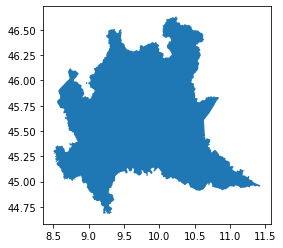

In [10]:
# Plot to have an overview about if the shapefile is correct
NUTS_Lom.plot()

In [16]:
# Save to cwd
NUTS_Lom.to_file(cwd_NUTS + '\\lom.shp')